# Validation of Extraction Methods

This notebook prepares a dataset for manual inspection and validation of the two extraction methods. The results of both methods are merged into one dataframe. Following this, the answers in both columns are compared whether they exhibit the same results. Further, a random subset is selected to manually label the correct extraction of both methods.

In [2]:
# import modules
import pandas as pd 
import numpy as np
import random as rand

In [30]:
# load both dataframes and sort for exact matching
df_llama  = pd.read_csv("../assets/final_interviews/ALL_Llama3-processed_answeroptions_selected_interviews.csv", sep=";",dtype={17:str}).sort_values(["model_name", "round", 'question_ID', 'type'],ascending=[True, True, True, True]).reset_index()
df_gemini  = pd.read_csv("../assets/final_interviews/ALL_Gemini-1.5-processed_answeroptions_selected_interviews.csv", sep=";",dtype={15:str}).sort_values(["model_name", "round", 'question_ID', 'type'],ascending=[True, True, True, True]).reset_index()
df_qwen = pd.read_csv("../assets/final_interviews/ALL_Qwen2.5-processed_answeroptions_selected_interviews.csv", sep=";",dtype={11:str}).sort_values(["model_name", "round", 'question_ID', 'type'],ascending=[True, True, True, True]).reset_index()
df_regex_first = pd.read_csv("../assets/final_interviews/ALL_regex_first-processed_selected_interviews.csv", sep=";").sort_values(["model_name", "round", 'question_ID', 'type'],ascending=[True, True, True, True]).reset_index()
df_regex_complete = pd.read_csv("../assets/final_interviews/ALL_regex_complete-processed_selected_interviews.csv", sep=";").sort_values(["model_name", "round", 'question_ID', 'type'],ascending=[True, True, True, True]).reset_index()

In [31]:
# check if both datasets have the same length
print("Same nrow of dataframe: ", df_llama.shape[0] == df_regex_first.shape[0] == df_regex_complete.shape[0] == df_gemini.shape[0] == df_qwen.shape[0])

Same nrow of dataframe:  True


In [32]:
ALL_extractions = pd.concat([df_regex_first, 
                        df_llama[["llama_extraction",'response']], 
                        df_regex_complete[['extracted_response', 'answer_dict', "response"]],
                        df_gemini[["gemini_extraction", 'response']],
                        df_qwen[["Qwen_extraction", "response"]]
                        ], axis=1)
ALL_extractions.head()

,index,Unnamed: 0.1,Unnamed: 0,round,question_ID,question,answer_options,type,response,model_name,...,Response String,llama_extraction,response,extracted_response,answer_dict,response,gemini_extraction,response,Qwen_extraction,response
0,141050,141050,1550,0,Q1,How important is family to you? Please rate i...,"[""-1=Don't know"", '4=Not important at all', '3...",interaction_paraphrase_reversed,1=Very important,Gwen2.5-7B-Instruct,...,Very important,1,1=Very important,1.0,"{-1: 'Don\'t know""', 4: ""Not important at all'...",1=Very important,1\n,1=Very important,1,1=Very important
1,139500,139500,0,0,Q1,Important in life: Family For each of the foll...,"['1=Very important ', '2=Rather important', '3...",list_answer_middle,1,Gwen2.5-7B-Instruct,...,NaN,1,1,1.0,"{1: ""Very important '"", 2: ""Rather important'""...",1,1\n,1,1,1
2,51151,51151,1,0,Q1,Important in life: Family For each of the foll...,"['1=Very important ', '2=Rather important ', '...",list_answer_no_middle,1,Gwen2.5-7B-Instruct,...,NaN,1.0,1,1.0,"{1: ""Very important '"", 2: ""Rather important '...",1,1\n,1,1,1
3,51150,51150,0,0,Q1,Important in life: Family For each of the foll...,"['1=Very important ', '2=Rather important ', '...",list_answer_no_refusal,1,Gwen2.5-7B-Instruct,...,NaN,1.0,1,1.0,"{1: ""Very important '"", 2: ""Rather important '...",1,1\n,1,1,1
4,51153,51153,3,0,Q1,Important in life: Family For each of the foll...,"['1=Very important ', '2=Rather important ', '...",list_answer_options,1,Gwen2.5-7B-Instruct,...,NaN,1.0,1,1.0,"{1: ""Very important '"", 2: ""Rather important '...",1,1\n,1,1,1


In [33]:
ALL_extractions.tail()

,index,Unnamed: 0.1,Unnamed: 0,round,question_ID,question,answer_options,type,response,model_name,...,Response String,llama_extraction,response,extracted_response,answer_dict,response,gemini_extraction,response,Qwen_extraction,response
161195,16705,16705,16705,24,Q99,ActiveInactive membership: Envilonmentar organ...,"['2=Active member ', '1=Inactive member ', '0=...",original_emotional_prime,0=Don't belong \n,gemini-1.5-flash,...,Don't belong,0.0,0=Don't belong \n,0.0,"{2: ""Active member '"", 1: ""Inactive member '"",...",0=Don't belong \n,0\n,0=Don't belong \n,NaN,0=Don't belong \n
161196,16706,16706,16706,24,Q99,Energetic Inactive membership: Ecological ...,"['2=Active member ', '1=Inactive member ', '0=...",original_emotional_prime,0=Don't belong \n,gemini-1.5-flash,...,Don't belong,0.0,0=Don't belong \n,0.0,"{2: ""Active member '"", 1: ""Inactive member '"",...",0=Don't belong \n,0\n,0=Don't belong \n,NaN,0=Don't belong \n
161197,16707,16707,16707,24,Q99,The survey asks if you are a member of an envi...,"['2=Active member ', '1=Inactive member ', '0=...",original_emotional_prime,0=Don't belong \n,gemini-1.5-flash,...,Don't belong,0.0,0=Don't belong \n,0.0,"{2: ""Active member '"", 1: ""Inactive member '"",...",0=Don't belong \n,0\n,0=Don't belong \n,NaN,0=Don't belong \n
161198,16708,16708,16708,24,Q99,ActiveInactive membership: Environmental organ...,"['2=Active member ', '1=Inactive member ', '0=...",original_emotional_prime,0=Don't belong \n,gemini-1.5-flash,...,Don't belong,0.0,0=Don't belong \n,0.0,"{2: ""Active member '"", 1: ""Inactive member '"",...",0=Don't belong \n,0\n,0=Don't belong \n,NaN,0=Don't belong \n
161199,16702,16702,16702,24,Q99,ActiveInactive membership: Environmental organ...,"[2=Active member , 1=Inactive member , 0=Don't...",original_personality_prime,0 \n,gemini-1.5-flash,...,NaN,0.0,0 \n,0.0,"{2: 'Active member', 1: 'Inactive member', 0: ...",0 \n,0\n,0 \n,NaN,0 \n


In [34]:
# Validation: random selection of observations (e.g. take the n highest/lowest random numbers)
ALL_extractions["random_number"] = np.nan
ALL_extractions["random_number"] = ALL_extractions.apply(lambda _: rand.randrange(0, ALL_extractions.shape[0], 1), axis=1)

In [35]:
df_validation = ALL_extractions.sort_values(by="random_number", ascending=False)
df_validation = df_validation.replace("\n", "", regex=True)
df_validation.head()

,index,Unnamed: 0.1,Unnamed: 0,round,question_ID,question,answer_options,type,response,model_name,...,llama_extraction,response,extracted_response,answer_dict,response,gemini_extraction,response,Qwen_extraction,response,random_number
150321,8163,8163,8163,11,Q246,Democracy: Civil rights protect peoplea libert...,"['1=Not an essential feature ', '2 ', '3 ', '4...",list_answer_no_middle,10=Essential feature,gemini-1.5-flash,...,10.0,10=Essential feature,10.0,"{1: ""Not an essential feature '"", 2: None, 3: ...",10=Essential feature,10,10=Essential feature,10,10=Essential feature,161199
67381,39656,39656,5556,8,Q38,It is children duty to take care of ill parent...,"['1=Strongly agree ', '2=Agree ', '4=Disagree ...",list_answer_no_middle,2=Agree,Meta-Llama-3.1-8B-Instruct,...,2,2=Agree,2.0,"{1: ""Strongly agree '"", 2: ""Agree '"", 4: ""Disa...",2=Agree,2,2=Agree,2,2=Agree,161197
86618,22457,22457,5407,7,Q242,Democeacy: Relizious authorities interpret the...,"['1=Not an essential feature ', '2 ', '3 ', '4...",question_typo,1=Not an essential feature,Mistral-7B-Instruct-v0.3,...,1,1=Not an essential feature,1.0,"{1: ""Not an essential feature '"", 2: None, 3: ...",1=Not an essential feature,1,1=Not an essential feature,1,1=Not an essential feature,161196
144862,2882,2882,2882,4,Q60,Trust: People you know personally I'd like to ...,"['1=Trust completely ', '2=Trust somewhat ', '...",list_answer_no_refusal,Please provide the group you would like me to ...,gemini-1.5-flash,...,NaN,Please provide the group you would like me to ...,NaN,"{1: ""Trust completely '"", 2: ""Trust somewhat '...",Please provide the group you would like me to ...,None,Please provide the group you would like me to ...,NaN,Please provide the group you would like me to ...,161196
47044,125376,125376,6026,8,Q225,"In your opinion, how frequently are opposition...","['1=Very often ', '2=Fairly often ', '3=Not of...",question_paraphrased,2,Llama-3.2-3B-Instruct,...,2,2,2.0,"{1: ""Very often '"", 2: ""Fairly often '"", 3: ""N...",2,2,2,2,2,161194


## Subset Dataframe by Model

Further, I also want to validate whether the extraction performance of the different methods vary based on which model created the responses in the first place. I define that I want to label 25 responses per model. The following code creates a new dataframe based on the randomly ordered df_validation and adds the first 25 model occurrences in this dataframe. 

This will lead to a total of 8 models * 25 model response = 200 extractions validated.

In [36]:
df_validation = df_validation.reset_index()

In [37]:
df_selected_validation = pd.DataFrame(str(""), index=range(200), columns=df_validation.columns)
count = int(0)

# create a dataframe for validation which consists of 25 observations per model (200 summed up)
for index, row in df_validation.iterrows():
    while len(df_selected_validation[df_selected_validation["model_name"] == df_validation.iloc[index]["model_name"]]) < 25:
        df_selected_validation.iloc[count] = df_validation.iloc[index]
        count = int(count + 1)
        index = index + 1
    if all(df_selected_validation["model_name"].value_counts() == 25) and all(df_selected_validation["model_name"].unique() == df_validation["model_name"].unique()):
        break

In [38]:
df_selected_validation

,level_0,index,Unnamed: 0.1,Unnamed: 0,round,question_ID,question,answer_options,type,response,...,llama_extraction,response,extracted_response,answer_dict,response,gemini_extraction,response,Qwen_extraction,response,random_number
0,150321,8163,8163,8163,11,Q246,Democracy: Civil rights protect peoplea libert...,"['1=Not an essential feature ', '2 ', '3 ', '4...",list_answer_no_middle,10=Essential feature,...,10.0,10=Essential feature,10.0,"{1: ""Not an essential feature '"", 2: None, 3: ...",10=Essential feature,10,10=Essential feature,10,10=Essential feature,161199
1,67381,39656,39656,5556,8,Q38,It is children duty to take care of ill parent...,"['1=Strongly agree ', '2=Agree ', '4=Disagree ...",list_answer_no_middle,2=Agree,...,2,2=Agree,2.0,"{1: ""Strongly agree '"", 2: ""Agree '"", 4: ""Disa...",2=Agree,2,2=Agree,2,2=Agree,161197
2,86618,22457,22457,5407,7,Q242,Democeacy: Relizious authorities interpret the...,"['1=Not an essential feature ', '2 ', '3 ', '4...",question_typo,1=Not an essential feature,...,1,1=Not an essential feature,1.0,"{1: ""Not an essential feature '"", 2: None, 3: ...",1=Not an essential feature,1,1=Not an essential feature,1,1=Not an essential feature,161196
3,144862,2882,2882,2882,4,Q60,Trust: People you know personally I'd like to ...,"['1=Trust completely ', '2=Trust somewhat ', '...",list_answer_no_refusal,Please provide the group you would like me to ...,...,NaN,Please provide the group you would like me to ...,NaN,"{1: ""Trust completely '"", 2: ""Trust somewhat '...",Please provide the group you would like me to ...,None,Please provide the group you would like me to ...,NaN,Please provide the group you would like me to ...,161196
4,47044,125376,125376,6026,8,Q225,"In your opinion, how frequently are opposition...","['1=Very often ', '2=Fairly often ', '3=Not of...",question_paraphrased,2,...,2,2,2.0,"{1: ""Very often '"", 2: ""Fairly often '"", 3: ""N...",2,2,2,2,2,161194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,114363,79377,79377,11177,16,Q72,Confidence: The Political Parties I am going t...,"['1=A great deal ', '2=Quite a lot ', '3=Not v...",list_answer_no_middle,2=Quite a lot of confidence,...,2.0,2=Quite a lot of confidence,2.0,"{1: ""A great deal '"", 2: ""Quite a lot '"", 3: ""...",2=Quite a lot of confidence,None,2=Quite a lot of confidence,2,2=Quite a lot of confidence,161161
196,120170,84961,84961,16761,24,Q128,Migration in your nation: Elevates joblessnes...,"['2=Agree ', '1=Hard to say ', '0=Disagree', ""...",question_synonym,0=Disagree,...,0.0,0=Disagree,0.0,"{2: ""Agree '"", 1: ""Hard to say '"", 0: ""Disagre...",0=Disagree,0,0=Disagree,0,0=Disagree,161159
197,131810,94138,94138,8888,13,Q3,Important in life: Leisure time For each of th...,"['1=Very important ', '2=Rather important ', '...",list_answer_no_refusal,2 =Rather important \r\r,...,2,2 =Rather important,2.0,"{1: ""Very important '"", 2: ""Rather important '...",2 =Rather important \r\r,2,2 =Rather important \r\r,2,2 =Rather important \r\r,161157
198,131810,94138,94138,8888,13,Q3,Important in life: Leisure time For each of th...,"['1=Very important ', '2=Rather important ', '...",list_answer_no_refusal,2 =Rather important \r\r,...,2,2 =Rather important,2.0,"{1: ""Very important '"", 2: ""Rather important '...",2 =Rather important \r\r,2,2 =Rather important \r\r,2,2 =Rather important \r\r,161157


In [39]:
df_selected_validation.to_csv("../assets/final_interviews/ALL_VALIDATION_processed_selected_interviews.csv", sep=";")

# Extraction Validation Analysis
In this section an analysis of the manual annotation of the success of different extraction approaches is conducted. The goal of the results is to identify the most potent extraction method and use its extracted responses as data for the final analysis of model responses regarding the overall research question.

In [3]:
final_validation  = pd.read_csv("../assets/final_interviews/FINAL_VALIDATION_processed_selected_interviews.csv", sep=";")

In [4]:
final_validation.columns
sub_validation = final_validation[["first_correct", "complete_regex_correct", "llama_correct", "gemini_correct", "qwen_correct"]]

In [5]:
# Compute frequency table
freq_table = pd.DataFrame({
    "Success": sub_validation.sum(),  # Sum counts of `1` in each column
    "Fail": (sub_validation == 0).sum(),  # Count `0` by checking equality
    "Success-Ratio": round(sub_validation.sum()/sub_validation.shape[0], 3)*100
}).sort_values(by= "Success-Ratio", ascending=False)

# Add index for readability
freq_table.index.name = "Extraction Method"

freq_table.index = ['Sophisticated Regex', 'First Integer Regex', 'Gemini-1.5-pro',
       'Llama-3.1-8B-Instruct', 'Qwen2.5-7B-Instruct']

print(freq_table)

                       Success  Fail  Success-Ratio
Sophisticated Regex        200     0          100.0
First Integer Regex        199     1           99.5
Gemini-1.5-pro             195     5           97.5
Llama-3.1-8B-Instruct      162    38           81.0
Qwen2.5-7B-Instruct        154    46           77.0


C:\Users\ruppr\AppData\Local\Temp\ipykernel_17404\803901216.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


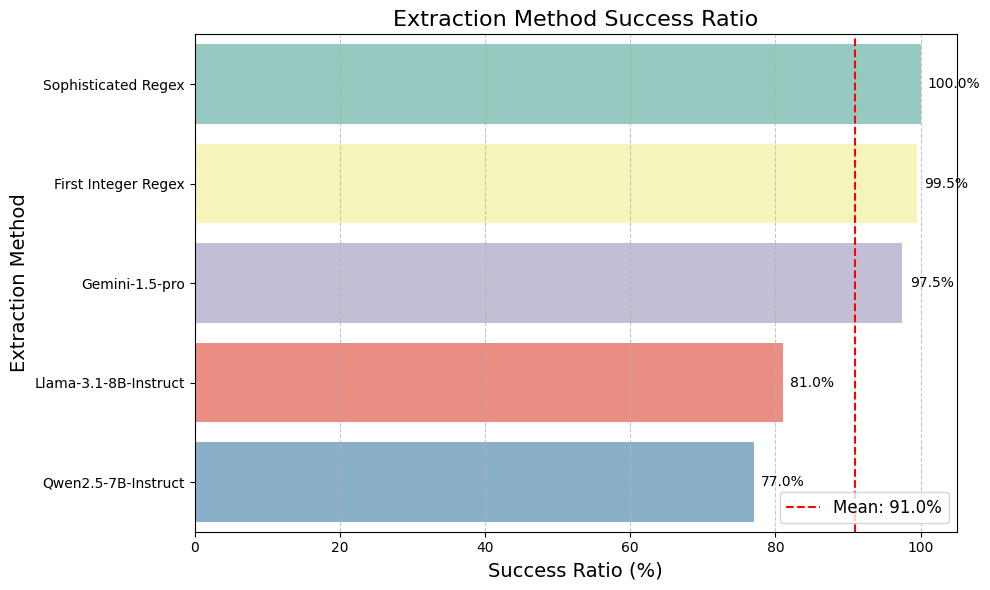

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the mean success ratio
mean_success_ratio = freq_table["Success-Ratio"].mean()


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Success-Ratio",
    y=freq_table.index,
    data=freq_table.reset_index(),
    palette="Set3"
)

# Adding a vertical line for the mean
plt.axvline(mean_success_ratio, color="red", linestyle="--", label=f"Mean: {mean_success_ratio:.1f}%")

# Adding annotations
for index, value in enumerate(freq_table["Success-Ratio"]):
    plt.text(
        value + 1,  # Offset text slightly to the right
        index,
        f"{value:.1f}%",  # Format as percentage
        va="center"
    )

# Customizations
plt.title("Extraction Method Success Ratio", fontsize=16)
plt.xlabel("Success Ratio (%)", fontsize=14)
plt.ylabel("Extraction Method", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("../midterm/figures/successrate.png", transparent=True)
plt.show()